In [1]:
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_anage = pl.read_csv("../../data/anage.csv", infer_schema_length=1000)
df_earthquakes = pl.read_csv(
    "../../data/EarthquakesChile_2000-2024.csv", try_parse_dates=True
).with_columns(Year=pl.col("Date").dt.year())

1. Usando el dataset de sismos de Chile, compara la distribución de magnitudes (`Magnitude_Ml`) en la región de Antofagasta entre dos años: 2014 y 2020. Crea dos gráficos: (a) un histograma con KDE superpuesto usando el parámetro `hue`, y (b) solo KDEs con relleno. ¿Qué año presenta magnitudes promedio más altas? ¿Cómo cambia la variabilidad entre años?

In [3]:
df_earthquakes_antofagasta = df_earthquakes.filter(
    pl.col("Region") == "Antofagasta",
    pl.col("Year").is_in([2014, 2020]),
)

[Text(0.5, 1.0, 'KDE of Earthquake Magnitudes in Antofagasta (2014 vs 2020)'),
 Text(0.5, 0, 'Magnitude (Ml)'),
 Text(0, 0.5, 'Density')]

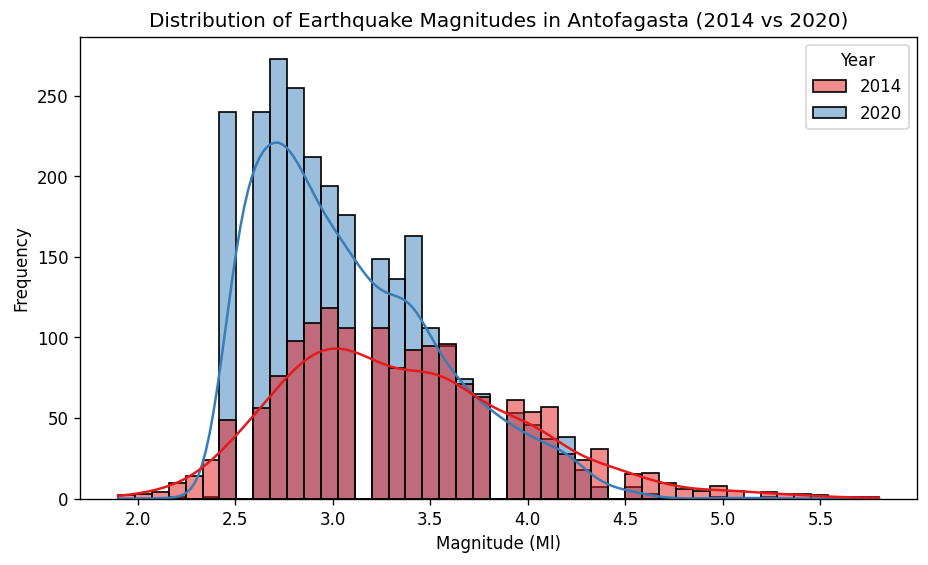

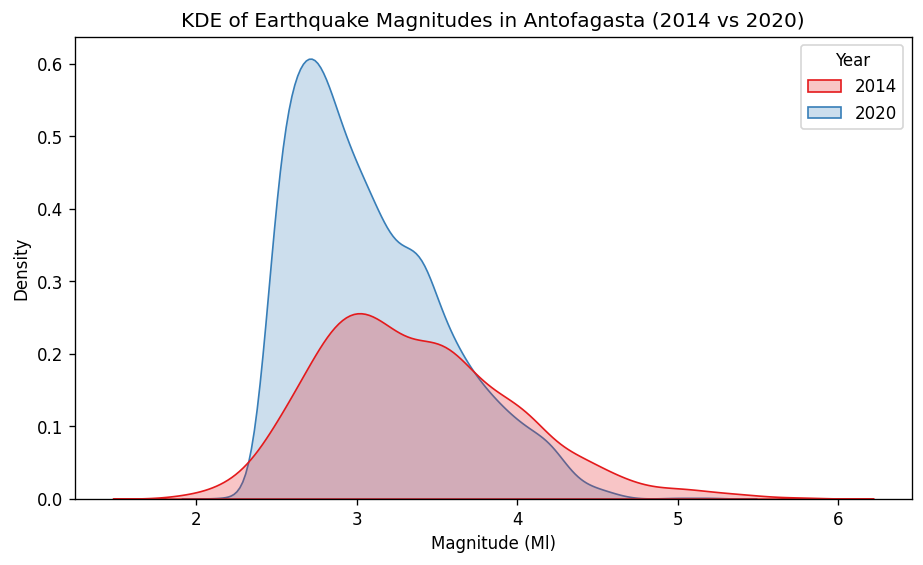

In [4]:
plt.figure(figsize=(9, 5), dpi=120)
sns.histplot(
    data=df_earthquakes_antofagasta,
    x="Magnitude_Ml",
    hue="Year",
    kde=True,
    palette="Set1",
).set(
    title="Distribution of Earthquake Magnitudes in Antofagasta (2014 vs 2020)",
    xlabel="Magnitude (Ml)",
    ylabel="Frequency",
)

plt.figure(figsize=(9, 5), dpi=120)
sns.kdeplot(
    data=df_earthquakes_antofagasta,
    x="Magnitude_Ml",
    hue="Year",
    fill=True,
    palette="Set1",
).set(
    title="KDE of Earthquake Magnitudes in Antofagasta (2014 vs 2020)",
    xlabel="Magnitude (Ml)",
    ylabel="Density",
)

2. Usando el dataset `anage`, compara la distribución de longevidad máxima (`Maximum longevity (yrs)`) entre animales salvajes y en cautiverio (`Specimen origin`) para la clase Mammalia. Crea dos visualizaciones: (a) un KDE plot con `fill=True` y transparencia, y (b) un boxplot. ¿Qué grupo tiende a vivir más tiempo? ¿Qué gráfico te permite identificar mejor los valores atípicos?

In [5]:
df_anage_mammalia = df_anage.filter(
    pl.col("Class") == "Mammalia",
    pl.col("Specimen origin") != "unknown",
)

[Text(0.5, 1.0, 'Boxplot of Maximum Longevity in Mammalia by Specimen Origin'),
 Text(0.5, 0, 'Specimen origin'),
 Text(0, 0.5, 'Maximum longevity (yrs)')]

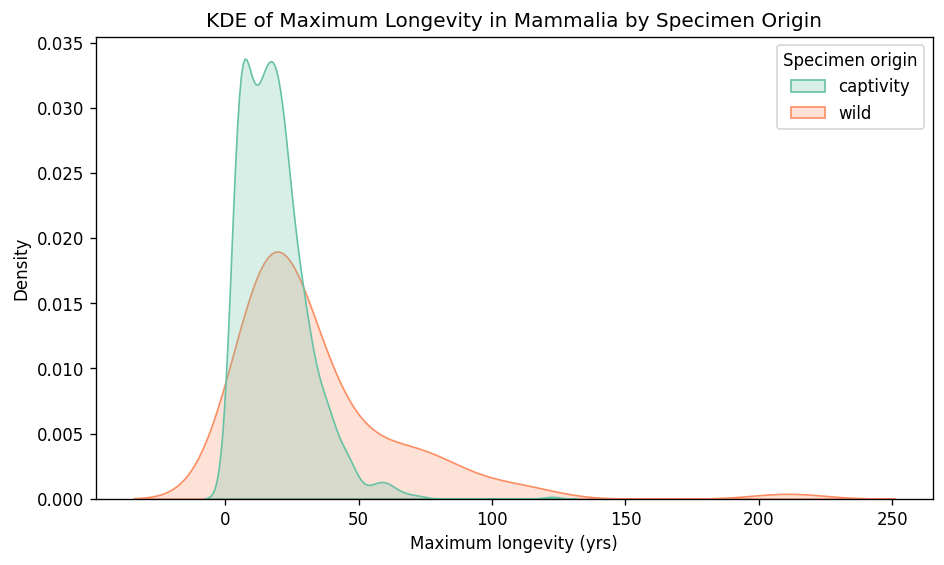

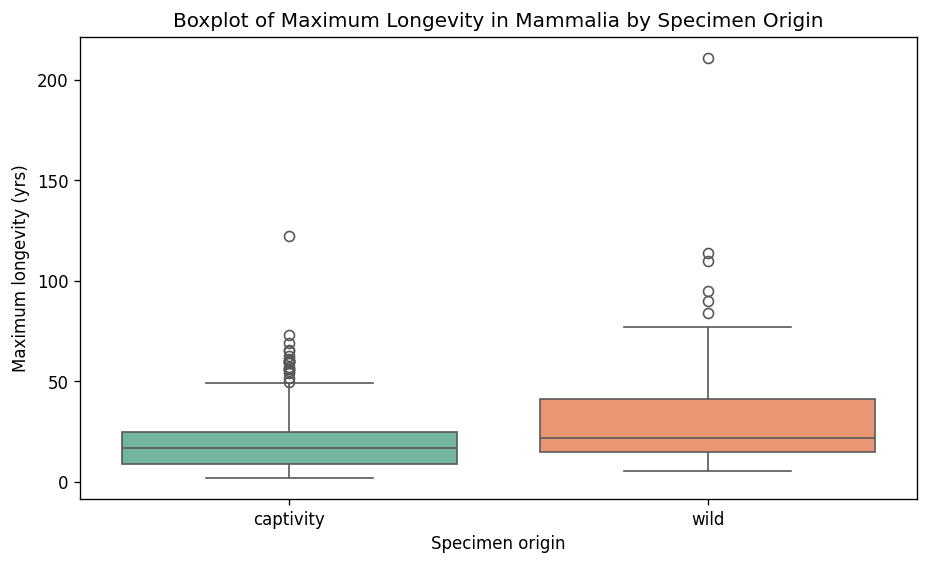

In [6]:
plt.figure(figsize=(9, 5), dpi=120)
sns.kdeplot(
    data=df_anage_mammalia,
    x="Maximum longevity (yrs)",
    hue="Specimen origin",
    fill=True,
    common_norm=False,
    palette="Set2",
).set(
    title="KDE of Maximum Longevity in Mammalia by Specimen Origin",
    xlabel="Maximum longevity (yrs)",
    ylabel="Density",
)

plt.figure(figsize=(9, 5), dpi=120)
sns.boxplot(
    data=df_anage_mammalia,
    x="Specimen origin",
    y="Maximum longevity (yrs)",
    hue="Specimen origin",
    palette="Set2",
).set(
    title="Boxplot of Maximum Longevity in Mammalia by Specimen Origin",
    xlabel="Specimen origin",
    ylabel="Maximum longevity (yrs)",
)

3. Compara la distribución de profundidad de sismos (`Profoundity_Km`) entre las regiones de Antofagasta, Atacama y Coquimbo para el año 2018. Crea tres visualizaciones diferentes: (a) boxplot, (b) violinplot con `inner="box"`, y (c) boxenplot. Ordena las regiones de norte a sur en todos los gráficos. ¿Cuál de las tres representaciones es más informativa? ¿Por qué?

In [7]:
selected_regions = ["Antofagasta", "Atacama", "Coquimbo"]

df_earthquakes_selected_2018 = df_earthquakes.filter(
    pl.col("Region").is_in(selected_regions),
    pl.col("Year") == 2018,
)

[Text(0.5, 1.0, 'Boxplot of Earthquake Profoundity in Selected Regions (2018)'),
 Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Profoundity (Km)')]

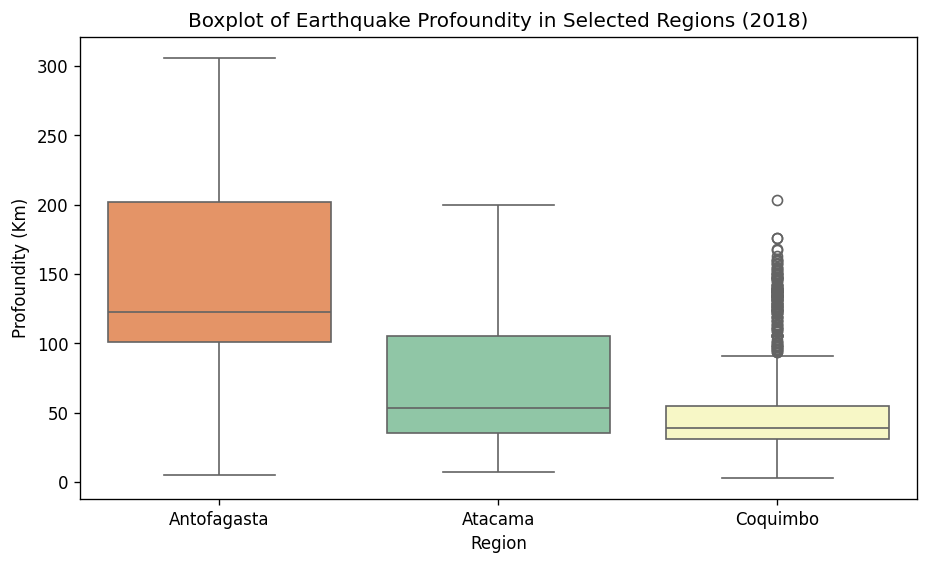

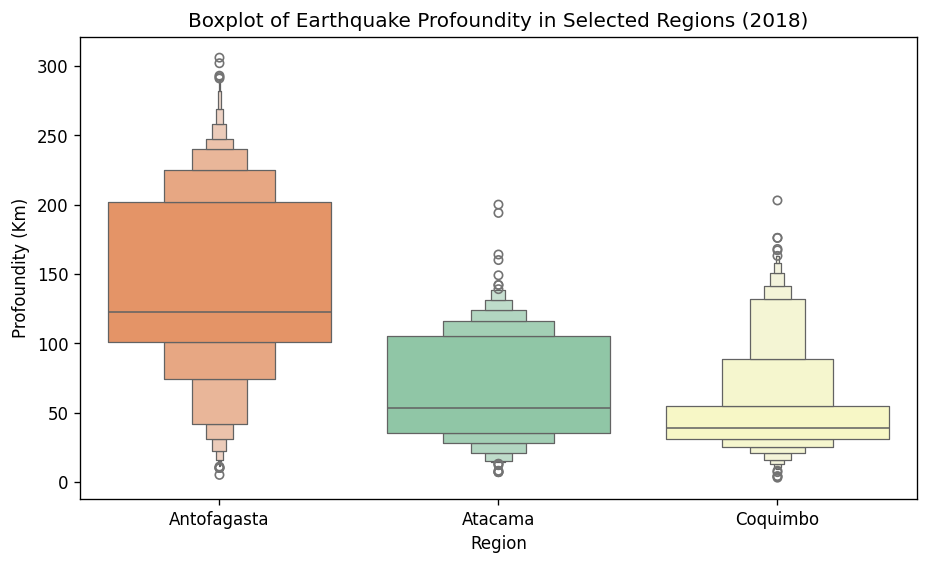

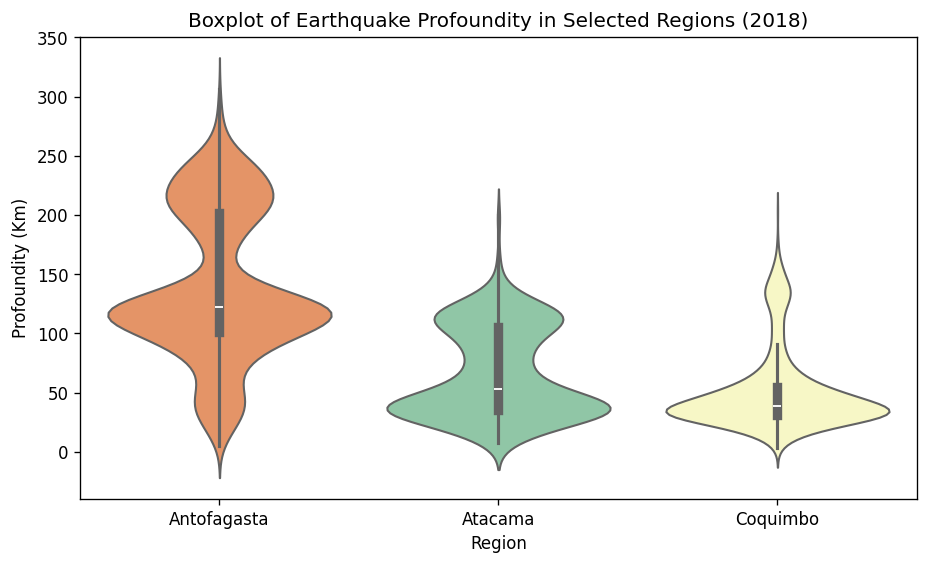

In [8]:
plt.figure(figsize=(9, 5), dpi=120)
sns.boxplot(
    data=df_earthquakes_selected_2018,
    x="Region",
    y="Profoundity_Km",
    order=selected_regions,
    hue="Region",
    palette="Spectral",
).set(
    title="Boxplot of Earthquake Profoundity in Selected Regions (2018)",
    xlabel="Region",
    ylabel="Profoundity (Km)",
)

plt.figure(figsize=(9, 5), dpi=120)
sns.boxenplot(
    data=df_earthquakes_selected_2018,
    x="Region",
    y="Profoundity_Km",
    order=selected_regions,
    hue="Region",
    palette="Spectral",
).set(
    title="Boxplot of Earthquake Profoundity in Selected Regions (2018)",
    xlabel="Region",
    ylabel="Profoundity (Km)",
)

plt.figure(figsize=(9, 5), dpi=120)
sns.violinplot(
    data=df_earthquakes_selected_2018,
    x="Region",
    y="Profoundity_Km",
    order=selected_regions,
    hue="Region",
    palette="Spectral",
).set(
    title="Boxplot of Earthquake Profoundity in Selected Regions (2018)",
    xlabel="Region",
    ylabel="Profoundity (Km)",
)


4. Utilizando el dataset `anage`, compara la distribución del peso al nacer (`Birth weight (g)`) entre cuatro órdenes de mamíferos: Rodentia, Carnivora, Artiodactyla y Primates. Utiliza un boxplot horizontal con escala logarítmica en el eje X para manejar las diferencias de magnitud. ¿Cuál orden taxonómico presenta mayor variabilidad?

In [9]:
# custom_order
selected_orders = ["Rodentia", "Primates", "Carnivora", "Artiodactyla"]

df_anage_birth_weight = df_anage.filter(
    pl.col("Class") == "Mammalia",
    pl.col("Order").is_in(selected_orders),
    pl.col("Birth weight (g)").is_not_null(),
)

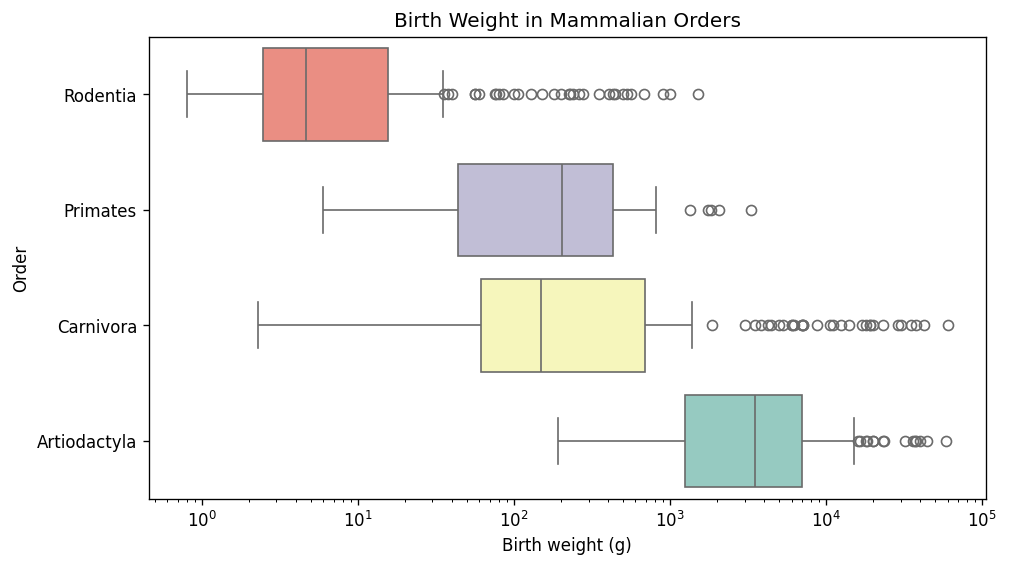

In [10]:
plt.figure(figsize=(9, 5), dpi=120)
sns.boxplot(
    data=df_anage_birth_weight,
    x="Birth weight (g)",
    y="Order",
    hue="Order",
    order=selected_orders,
    palette="Set3",
    legend=False,
).set(
    title="Birth Weight in Mammalian Orders",
    xlabel="Birth weight (g)",
    ylabel="Order",
)

plt.xscale("log")

5. Usando el dataset de sismos de la región del Maule durante 2010, explora la relación entre profundidad (`Profoundity_Km`) y magnitud (`Magnitude_Ml`) mediante un KDE plot bidimensional. Usa `fill=True` para visualizar las zonas de mayor densidad. ¿Dónde se concentra la mayor densidad de sismos?

In [11]:
df_earthquakes_maule_2010 = df_earthquakes.filter(
    pl.col("Region") == "Maule",
    pl.col("Date").dt.year() == 2010,
)

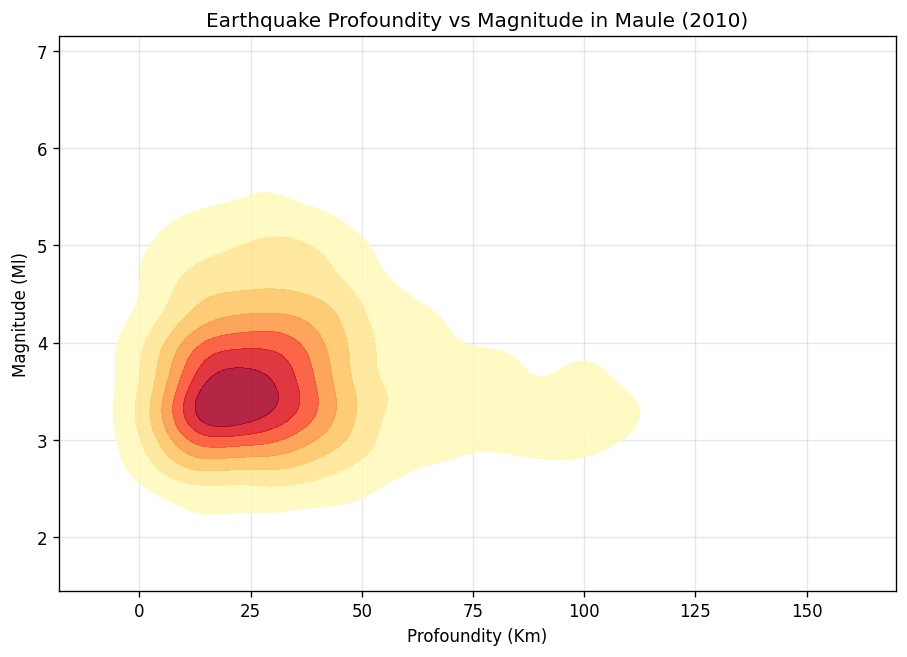

In [12]:
plt.figure(figsize=(9, 6), dpi=120)
ax = sns.kdeplot(
    data=df_earthquakes_maule_2010,
    x="Profoundity_Km",
    y="Magnitude_Ml",
    fill=True,
    cmap="YlOrRd",
    alpha=0.85,
    levels=8,
    thresh=0.05,
)
ax.set(
    title="Earthquake Profoundity vs Magnitude in Maule (2010)",
    xlabel="Profoundity (Km)",
    ylabel="Magnitude (Ml)",
)

plt.grid(True, alpha=0.3)
ax.set_axisbelow(True)

6. Usando el dataset `anage`, compara la distribución de la tasa metabólica (`Metabolic rate (W)`) entre diferentes órdenes de mamíferos. Filtra los 6 órdenes con más datos disponibles (al menos 15 registros cada uno) y crea un boxenplot horizontal. ¿Qué orden presenta los valores más extremos?

In [13]:
df_orders_with_data = (
    df_anage.filter(Class="Mammalia")
    .drop_nulls("Metabolic rate (W)")
    .group_by("Order")
    .len("n")
    .filter(pl.col("n") >= 15)
    .sort("n", descending=True)
    .head(6)
    .select("Order")
    .to_series()
    .to_list()
)

df_anage_metabolic_rate = df_anage.filter(pl.col("Order").is_in(df_orders_with_data)).drop_nulls(
    "Metabolic rate (W)"
)

# order by mean
order_categories = (
    df_anage_metabolic_rate.group_by("Order")
    .agg(pl.col("Metabolic rate (W)").mean())
    .sort("Metabolic rate (W)")
    .select("Order")
    .to_series()
    .to_list()
)

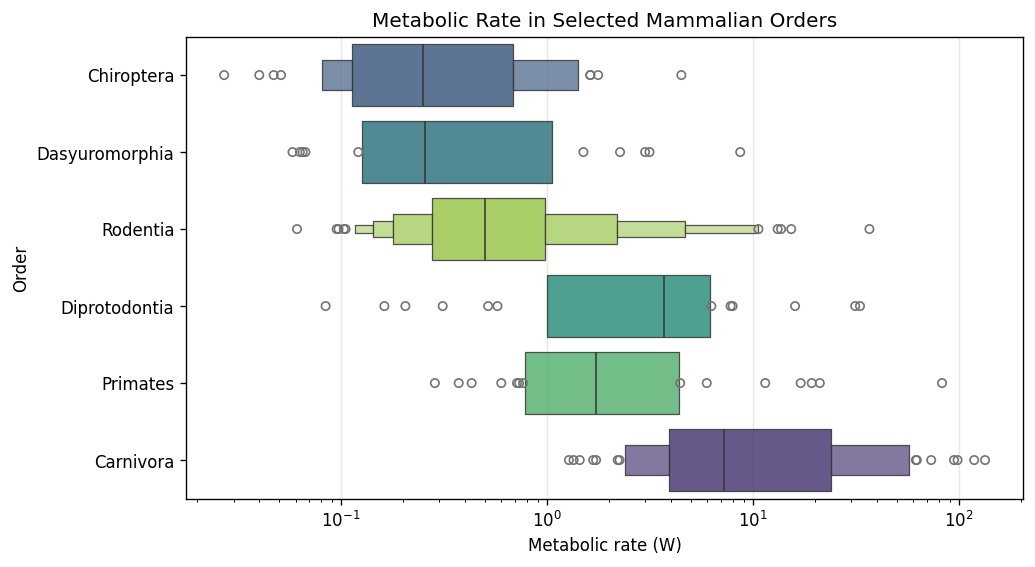

In [14]:
plt.figure(figsize=(9, 5), dpi=120)
ax = sns.boxenplot(
    data=df_anage_metabolic_rate,
    y="Order",
    x="Metabolic rate (W)",
    hue="Order",
    order=order_categories,
    palette="viridis",
    alpha=0.85,
    legend=False,
)
ax.set(
    title="Metabolic Rate in Selected Mammalian Orders",
    xlabel="Metabolic rate (W)",
    ylabel="Order",
)

plt.xscale("log")
plt.grid(True, alpha=0.3, axis="x")
ax.set_axisbelow(True)

7. Analiza la distribución de magnitudes de sismos por año en la región de Los Lagos (filtra los años 2016-2021). Crea un violinplot que muestre la distribución para cada año, ordenados cronológicamente. Usa `hue="Year"` para diferenciar con colores. ¿Se observa alguna tendencia en la magnitud promedio o variabilidad a lo largo de los años?

In [15]:
df_earthquakes_loslagos = df_earthquakes.filter(
    pl.col("Region") == "Los Lagos",
    pl.col("Year").is_between(2016, 2021),
)

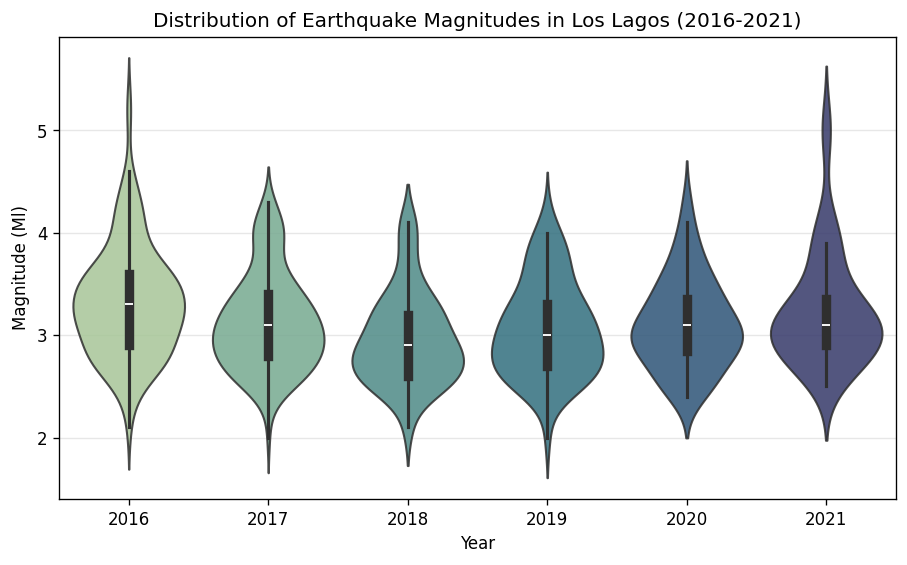

In [16]:
plt.figure(figsize=(9, 5), dpi=120)
ax = sns.violinplot(
    data=df_earthquakes_loslagos,
    x="Year",
    y="Magnitude_Ml",
    hue="Year",
    palette="crest",
    alpha=0.85,
    legend=False,
)
ax.set(
    title="Distribution of Earthquake Magnitudes in Los Lagos (2016-2021)",
    xlabel="Year",
    ylabel="Magnitude (Ml)",
)

plt.grid(True, alpha=0.3, axis="y")
ax.set_axisbelow(True)